<a href="https://colab.research.google.com/github/rishab-98/Face-Recognition/blob/master/FaceRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
pip install face_recognition

     |████████████████████████████████| 100.2MB 110kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566172 sha256=ad7fefbc00467935c45cb9f1fa0694fcf24ee29c5c1ff94ba94a7568d4efd510
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


**Importing Libraries**

In [4]:
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np
import face_recognition
import cv2
import os
from google.colab.patches import cv2_imshow

**Function to read Images from specified path**

In [5]:
def read_img(path):
  img =cv2.imread(path)
  (h,w)=img.shape[:2]
  width=500
  ratio=width/float(w)
  height=int(ratio*h)
  return cv2.resize(img,(width,height))

**Make directories to read Images from**

In [34]:
!mkdir known
!mkdir unknown

In [35]:
known_dir='known'
unknown_dir='unknown'

**Read Images from Known folder for Training**

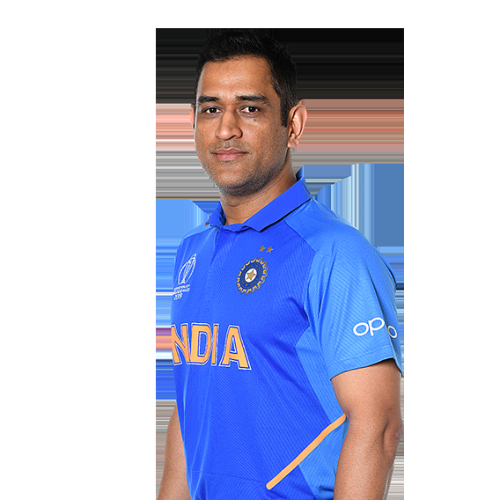

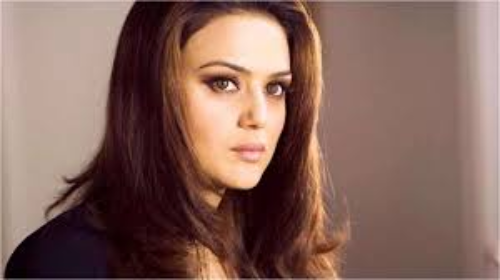

2


In [36]:
known_encodings=[]
known_names=[]
for file in os.listdir(known_dir):
  img = read_img(known_dir + '/' + file)
  img_enc = face_recognition.face_encodings(img)[0]
  known_encodings.append(img_enc)
  known_names.append(file.split('.')[0])
  cv2_imshow(img)


print(len(known_encodings))
 


**Read images from unknown folder and comapre with Training Data**

Processing img2.jpg
[False, False]
[0.7165311  0.80834731]
Processing 715005-ms-dhoni.jpg
[True, False]
[0.46605779 0.95377723]
dhoni


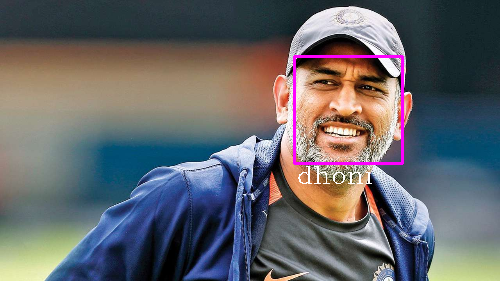

Processing b7c6106dd94e16366b3b1f6c2cf296aa.jpg
[False, True]
[0.91389954 0.45076451]
preityZinta


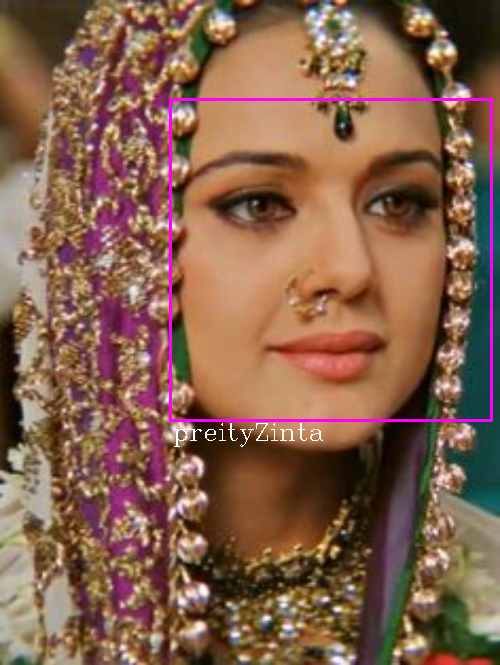

In [37]:
for file in os.listdir(unknown_dir):
  print("Processing",file)
  img = read_img(unknown_dir + '/' + file)
  img_enc= face_recognition.face_encodings(img)[0]
  results=face_recognition.compare_faces(known_encodings, img_enc)
  print(results)
  print(face_recognition.face_distance(known_encodings, img_enc))
  for i in range(len(results)):
      if results[i]:
         print(known_names[i])
      if results[i]:
        name=known_names[i]
        (top, right, bottom, left)=face_recognition.face_locations(img)[0]
        cv2.rectangle(img, (left, top), (right, bottom), (255,0,255), 2)
        cv2.putText(img, name, (left+2, bottom+20), cv2.FONT_HERSHEY_COMPLEX, 0.8, (255,255,255),1)
        cv2_imshow(img)
      